In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import codecs



# Any results you write to the current directory are saved as output.

['Pokemon.csv']


In [37]:
data = pd.read_csv('../input/Pokemon.csv')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [39]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [40]:
data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [41]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [42]:
data.shape

(800, 13)

In [43]:
print(data['Type 1'].value_counts(dropna =False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [44]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


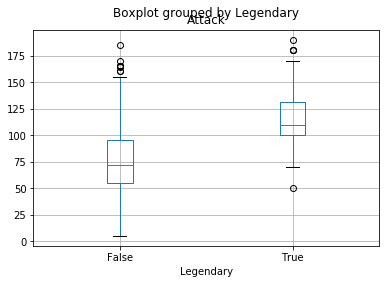

In [70]:
#Örneğin:efsanevi olan veya olmayan pokemon saldırılarını karşılaştırabilir
# siyah çizgi at top is max
# mavi çizgi at top is 75%
# kırmızı çizgi is median (50%)
# mavi çizgi at bottom is 25%
# siyah çizgi at bottom is min
# Aykırılık yok
data.boxplot(column='Attack',by = 'Legendary')
plt.show()

In [46]:
data_new=data.head()
data_new

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [47]:
melted = pd.melt(frame=data_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,VenusaurMega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,VenusaurMega Venusaur,Defense,123
9,Charmander,Defense,43


In [48]:
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Venusaur,82,83
VenusaurMega Venusaur,100,123


In [49]:
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
6,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
7,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
8,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
9,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [50]:
data1 = data['Attack'].head()
data2= data['Defense'].head()
conc_data_col = pd.concat([data1,data2],axis =1) # axis = 0 : adds dataframes in row
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [51]:
data['Type 1'] = data['Type 1'].astype('category')
data['Speed'] = data['Speed'].astype('float')

In [52]:
data.dtypes

#                int64
Name            object
Type 1        category
Type 2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

In [53]:
data["Type 2"].value_counts(dropna =False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Water        14
Ice          14
Ghost        14
Rock         14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [54]:
data1=data
data1["Type 2"].dropna(inplace = True)

In [55]:
assert  data['Type 2'].notnull().all() # returns nothing because we drop nan values

In [56]:
data["Type 2"].fillna('empty',inplace = True)

In [57]:
assert  data['Type 2'].notnull().all() # returns nothing because we do not have nan values

In [58]:
country=["Spain","France"]
population=["11","12"]
list_label=["country","population"]
list_col=[country,population]
zipped=list(zip(list_label,list_col))
data_dict=dict(zipped)
df=pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


In [59]:
#Add new columns
df["capital"]=["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [60]:
#broadcasting
df["income"]=0
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


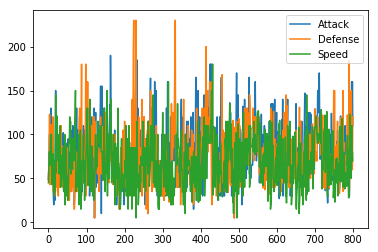

In [68]:
#ploting all data
data1=data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
plt.show()

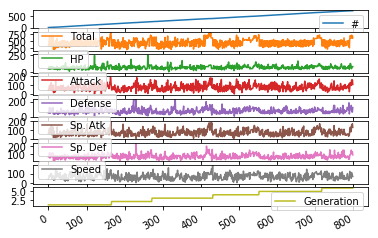

In [62]:
data.plot(subplots=True)
plt.show()

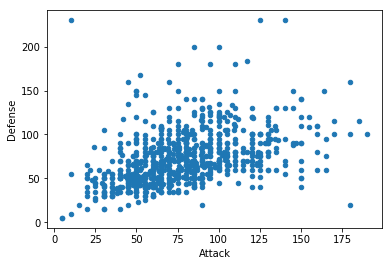

In [63]:
data1.plot(kind="scatter",x="Attack",y="Defense")
plt.show()

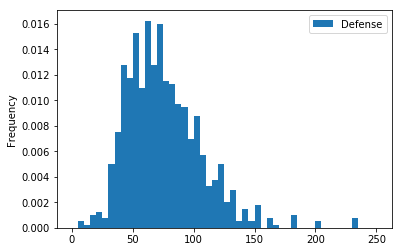

In [69]:
data1.plot(kind="hist",y="Defense",bins=50,range=(0,250),normed=True)
plt.show()

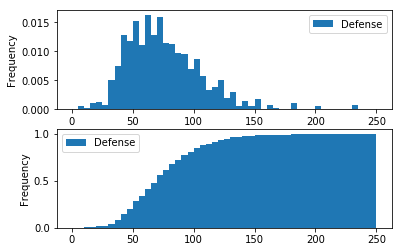

In [65]:
fig,axes=plt.subplots(nrows=2,ncols=1)
data1.plot(kind='hist',y='Defense',bins=50,range=(0,250),normed=True,ax=axes[0])
data1.plot(kind='hist',y='Defense',bins=50,range=(0,250),normed=True,ax=axes[1],cumulative=True)
plt.savefig('graph.png')
plt.show()

In [66]:
time_list=["1992-03-08","1992-04-12"]
print(type(time_list[1]))
datetime_object=pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [71]:
data2=data.head()
date_list=["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object=pd.to_datetime(date_list)
data2['date']=datetime_object
data2=data2.set_index('date')
data2

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45.0,1,False
1992-02-10,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60.0,1,False
1992-03-10,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80.0,1,False
1993-03-15,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80.0,1,False
1993-03-16,4,Charmander,Fire,NaN,309,39,52,43,60,50,65.0,1,False


In [72]:
print(data2.loc['1993-03-16'])
print(data2.loc['1992-03-10':'1993-03-16'])

#                      4
Name          Charmander
Type 1              Fire
Type 2               NaN
Total                309
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object
            #                   Name    ...    Generation Legendary
date                                    ...                        
1992-03-10  3               Venusaur    ...             1     False
1993-03-15  3  VenusaurMega Venusaur    ...             1     False
1993-03-16  4             Charmander    ...             1     False

[3 rows x 13 columns]


In [73]:
data2.resample('A').mean()


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,
1992-12-31,2.0,416.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,3.5,467.0,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


In [74]:
data2.resample('M').mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,
1992-01-31,1.0,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
data2.resample('M').first().interpolate("linear")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,,
1992-01-31,1.0,Bulbasaur,Grass,Poison,318.000000,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0,False
1992-02-29,2.0,Ivysaur,Grass,Poison,405.000000,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0,False
1992-03-31,3.0,Venusaur,Grass,Poison,525.000000,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0,False
1992-04-30,3.0,NaN,NaN,NaN,533.333333,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0,NaN
1992-05-31,3.0,NaN,NaN,NaN,541.666667,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0,NaN
1992-06-30,3.0,NaN,NaN,NaN,550.000000,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0,NaN
1992-07-31,3.0,NaN,NaN,NaN,558.333333,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0,NaN
1992-08-31,3.0,NaN,NaN,NaN,566.666667,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0,NaN
1992-09-30,3.0,NaN,NaN,NaN,575.000000,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0,NaN
